# Practical 5: Introduction to exiobase

In this practical, you will learn how to load and work with exiobase

You can download exiobase through this link https://zenodo.org/record/5589597
 
We will work with: IOT_2019_pxp.zip

The objectives of the practical are:
- See the data available within exiobase
- Calculate footprints using exiobase
- Make a visualization

## Exercise 1: Load the data

Import the IO exiobase data for the year 2019 in product-by-product format

In [1]:
# Import modules
import pandas as pd
import numpy as np

#### 1.1 Import exiobase

Beware: exiobase is composed by large datasets so it may take some time to load and process

In [2]:
A = pd.read_csv('data/IOT_2019_pxp/A.txt', sep='\t',
                index_col=[0, 1], header=[0, 1])  # A matrix
Y = pd.read_csv('data/IOT_2019_pxp/Y.txt', sep='\t',
                index_col=[0, 1], header=[0, 1])  # Y matrix
F = pd.read_csv('data/IOT_2019_pxp/impacts/F.txt', sep='\t',
                index_col=[0], header=[0, 1])  # impacts matrix
F_hh = pd.read_csv('data/IOT_2019_pxp/impacts/F_y.txt', sep='\t',
                index_col=[0], header=[0, 1])  # impacts for FD matrix

In [3]:
F_hh = pd.read_csv('data/IOT_2019_pxp/impacts/F_y.txt', sep='\t', index_col=[0], header=[0,1])
                # index_col=[0], header=[0, 1])  # impacts for FD matrix

F_hh

region                                                                                      AT  \
category                                           Final consumption expenditure by households   
impact                                                                                           
Value Added                                                                       0.000000e+00   
Employment                                                                        0.000000e+00   
Employment hour                                                                   0.000000e+00   
GHG emissions (GWP100) | Problem oriented appro...                                1.423881e+10   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                                1.809445e+02   
...                                                                                        ...   
Unused Domestic Extraction - Oil and Gas                                          0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals                                 0.000000e+00   
Unused Domestic Extraction - Iron Ore                                             0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores                                0.000000e+00   
Land use Crop, Forest, Pasture                                                    3.593989e+03   

region                                                                                                                                   \
category                                           Final consumption expenditure by non-profit organisations serving households (NPISH)   
impact                                                                                                                                    
Value Added                                                                              0.000000e+00                                     
Employment                                                                               0.000000e+00                                     
Employment hour                                                                          0.000000e+00                                     
GHG emissions (GWP100) | Problem oriented appro...                                       5.922743e+08                                     
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                                       8.657653e-01                                     
...                                                                                               ...                                     
Unused Domestic Extraction - Oil and Gas                                                 0.000000e+00                                     
Unused Domestic Extraction - Non-metalic Minerals                                        0.000000e+00                                     
Unused Domestic Extraction - Iron Ore                                                    0.000000e+00                                     
Unused Domestic Extraction - Non-ferous metal ores                                       0.000000e+00                                     
Land use Crop, Forest, Pasture                                                           0.000000e+00                                     

region                                                                                          \
category                                           Final consumption expenditure by government   
impact                                                                                           
Value Added                                                                       0.000000e+00   
Employment                                                                        0.000000e+00   
Employment hour                                                                   0.000000e+00   
GHG emissions (GWP100) | Problem oriented appro...                                7.515299e+

#### 1.2 Look at the available labels in exiobase
You may do this by printing the labels of your imported matrices or by opening the following files in your data folder:
- finaldemands.txt
- products.txt
- impacts/unit.txt

In [4]:
units = pd.read_csv('data/IOT_2019_pxp/impacts/unit.txt', sep='\t',
                index_col=[0], header=[0, 0])
units

impact,unit
impact,unit
Value Added,M.EUR
Employment,1000 p.
Employment hour,hr
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",kg CO2 eq.
"Human toxicity (USEtox) | USEtox2008 | CTUh (Rosenbaum et al., 2008)",cases
...,...
Unused Domestic Extraction - Oil and Gas,kt
Unused Domestic Extraction - Non-metalic Minerals,kt
Unused Domestic Extraction - Iron Ore,kt


Since we don't have a file showing all individual regions. 
Here is a code example of how you can get a list of all the regions within exiobase

In [28]:
# First we collect all labels from A
A_labels = A.index
A_labels

MultiIndex([('AT',                                          'Paddy rice'),
            ('AT',                                               'Wheat'),
            ('AT',                                   'Cereal grains nec'),
            ('AT',                             'Vegetables, fruit, nuts'),
            ('AT',                                           'Oil seeds'),
            ('AT',                              'Sugar cane, sugar beet'),
            ('AT',                                  'Plant-based fibers'),
            ('AT',                                           'Crops nec'),
            ('AT',                                              'Cattle'),
            ('AT',                                                'Pigs'),
            ...
            ('WM',                       'Paper for treatment: landfill'),
            ('WM',               'Plastic waste for treatment: landfill'),
            ('WM', 'Inert/metal/hazardous waste for treatment: landfill'),
         

In [30]:
# .to_frame to turn the collected labels into a dataframe
A_labels_ = A_labels.to_frame(index=None)
A_labels_

,region,sector
0,AT,Paddy rice
1,AT,Wheat
2,AT,Cereal grains nec
3,AT,"Vegetables, fruit, nuts"
4,AT,Oil seeds
...,...,...
9795,WM,Membership organisation services n.e.c. (91)
9796,WM,"Recreational, cultural and sporting services (92)"
9797,WM,Other services (93)
9798,WM,Private households with employed persons (95)


A_labels is composed by two columns "region" and "sector"
by doing 

> A_labels.region 

or 

> A_labels.sector 

you can access the specific columns 

N.b.
it is the equivalent of doing 

> A_labels.loc[:, "region"]

How do we know how many regions, sectors or categories do we have available?

In [38]:
# Then we extract region column and eliminate any duplicate labels
# We do this because the labels are replicated for each sectoral category in each region
regions_labels = A_labels_.region.drop_duplicates().reset_index(drop=True)

# We print the regional labels so that we can see the regions we have to work with
regions_labels

0     AT
1     BE
2     BG
3     CY
4     CZ
5     DE
6     DK
7     EE
8     ES
9     FI
10    FR
11    GR
12    HR
13    HU
14    IE
15    IT
16    LT
17    LU
18    LV
19    MT
20    NL
21    PL
22    PT
23    RO
24    SE
25    SI
26    SK
27    GB
28    US
29    JP
30    CN
31    CA
32    KR
33    BR
34    IN
35    MX
36    RU
37    AU
38    CH
39    TR
40    TW
41    NO
42    ID
43    ZA
44    WA
45    WL
46    WE
47    WF
48    WM
Name: region, dtype: object

In [47]:
sectors_labels = A_labels_.sector.drop_duplicates()

# Print your labels to analyse them (remember .to_frame)
sectors_labels.iloc[100:150]

100                             Cement, lime and plaster
101    Ash for treatment, Re-processing of ash into c...
102                  Other non-metallic mineral products
103    Basic iron and steel and of ferro-alloys and f...
104    Secondary steel for treatment, Re-processing o...
105                                      Precious metals
106    Secondary preciuos metals for treatment, Re-pr...
107                     Aluminium and aluminium products
108    Secondary aluminium for treatment, Re-processi...
109              Lead, zinc and tin and products thereof
110    Secondary lead for treatment, Re-processing of...
111                                      Copper products
112    Secondary copper for treatment, Re-processing ...
113                     Other non-ferrous metal products
114    Secondary other non-ferrous metals for treatme...
115                                Foundry work services
116    Fabricated metal products, except machinery an...
117                  Machinery 

## Exercise 2: Calculate the rest of the IO variables (I, L, x)

#### 2.1 First we calculate the Leontief inverse

In [9]:
I = np.identity(A.shape[0]) # A.shape[1] is the total number of columns in the A matrix
L = np.linalg.inv(I-A)

#### 2.2 We calculate our product output x

In [10]:
x = L@Y.sum(axis=1)

# A check to see whether the resulting x is right
print(x.shape)
print(x)

(9800,)
[    0.           359.79773658   864.54809943 ... 35533.35519031
  6245.82863651     0.        ]


## Exercise 3: Create a matrix of extension intensities 

When working with real data, you will find cases in which the produt output vector x contains 0's 

If you try to invert the diagonalized product output, it will tell you that you cannot invert a Singular matrix.

There are various reasons why a matrix may be singular but in our case it is due to the fact that not all values are non-zeros

You may then be tempted to perform 1/x, however, this may results in several divisions by 0's and the resulting matrix will be filled with NaN values or inf values.

One way to get around this: Divide 1 by the values that are non-0 as shown in the following example

In [11]:
# we make a copy of our product output vector
x_inv = x.copy() 

# we divide 1 by the values that are non-0
x_inv[x_inv!=0] = 1/x_inv[x_inv!=0]

We calculate our intensities (i.e., extension coefficients)

In [12]:
# We are essentially dividing the total extension by the product output
# This gives us coefficients of extension by unit of output (e.g., kg/euro)
f = F * x_inv

f

region                                                     AT                \
sector                                             Paddy rice         Wheat   
impact                                                                        
Value Added                                               0.0  6.758705e-01   
Employment                                                0.0  2.162651e-02   
Employment hour                                           0.0  4.759831e+04   
GHG emissions (GWP100) | Problem oriented appro...        0.0  1.690932e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...        0.0  6.446307e-03   
...                                                       ...           ...   
Unused Domestic Extraction - Oil and Gas                  0.0  0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals         0.0  0.000000e+00   
Unused Domestic Extraction - Iron Ore                     0.0  0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores        0.0  0.000000e+00   
Land use Crop, Forest, Pasture                            0.0  7.079127e+00   

region                                                                \
sector                                             Cereal grains nec   
impact                                                                 
Value Added                                                 0.742589   
Employment                                                  0.016105   
Employment hour                                         36782.612201   
GHG emissions (GWP100) | Problem oriented appro...     935119.414396   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...          0.002427   
...                                                              ...   
Unused Domestic Extraction - Oil and Gas                    0.000000   
Unused Domestic Extraction - Non-metalic Minerals           0.000000   
Unused Domestic Extraction - Iron Ore                       0.000000   
Unused Domestic Extraction - Non-ferous metal ores          0.000000   
Land use Crop, Forest, Pasture                              4.918618   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Value Added                                                       0.690073   
Employment                                                        0.022381   
Employment hour                                               50517.645427   
GHG emissions (GWP100) | Problem oriented appro...           181589.602023   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                0.000605   
...                                                                    ...   
Unused Domestic Extraction - Oil and Gas                          0.000000   
Unused Domestic Extraction - Non-metalic Minerals                 0.000000   
Unused Domestic Extraction - Iron Ore                             0.000000   
Unused Domestic Extraction - Non-ferous metal ores                0.000000   
Land use Crop, Forest, Pasture                                    0.926486   

region                                                            \
sector                                                 Oil seeds   
impact                                                             
Value Added                                         8.318040e-01   
Employment                                          2.495181e-02   
Employment hour                                     5.897691e+04   
GHG emissions (GWP100) | Problem oriented appro...  1.301896e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...  3.198484e-03   
...                                                          ...   
Unused Domestic Extraction - Oil and Gas            0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals   0.000000e+00   
Unused Domestic Extraction - Iron Ore      

N.b. inverting a matrix is a more complex operation than just dividing 1 by the values in your matrix. 

However, in the case of a diagonalized vector with non-zero values along the diagonal 1/diag(x) and inv(diag(x)) output the same results. 

If you have zero's in x vector to be diagonalized then you will not be able to perform the inversion.    

## Exercise 4: Total footprint of the Netherlands


- *What is the total carbon footprint of the Netherlands?*


$\text{F} = \text{f} \mathbf{L}\text{Y} + \text{F}_{hh}$

#### 4.1 We first create a (modified) final demand matrix

4.1.1 Lets identify the range of the Y columns concerning the Netherlands

In [13]:
# we know NL is the 20th country (python counting starting from 0) in the list of countries 
# and that we have 7 final demand categories, therefore

start_NL = 20*7 + 0
end_NL = 20*7 + 7

4.1.2 We calculate the modified Y

You can slice your Y by using pandas iloc method 

> Y.iloc[:,start_NL:end_NL]

In [14]:
Y_mod = Y.iloc[: , start_NL:end_NL]
Y_mod

region                                                                                            NL  \
category                                                 Final consumption expenditure by households   
region sector                                                                                          
AT     Paddy rice                                                                       0.000000e+00   
       Wheat                                                                            8.109941e-01   
       Cereal grains nec                                                                7.538257e-01   
       Vegetables, fruit, nuts                                                          3.635396e+00   
       Oil seeds                                                                        3.967363e-09   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                     1.313962e-03   
       Recreational, cultural and sporting services (92)                                0.000000e+00   
       Other services (93)                                                              1.449982e+00   
       Private households with employed persons (95)                                    0.000000e+00   
       Extra-territorial organizations and bodies                                       0.000000e+00   

region                                                                                                                                         \
category                                                 Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                                                                   
AT     Paddy rice                                                                                  0.000000                                     
       Wheat                                                                                       0.000000                                     
       Cereal grains nec                                                                           0.000000                                     
       Vegetables, fruit, nuts                                                                     0.000000                                     
       Oil seeds                                                                                   0.000000                                     
...                                                                                                     ...                                     
WM     Membership organisation services n.e.c. (91)                                                0.252829                                     
       Recreational, cultural and sporting services (92)                                           0.747362                                     
       Other services (93)                                                                         0.000000                                     
       Private households with employed persons (95)                                               0.000000                                     
       Extra-territorial organizations and bodies                                                  0.000000                                     

region                                                                                                \
category                                                 Final consumption expenditure by government   
region sector                                                                                          
AT     Paddy rice                                                                           0.000000   
       Wheat                                                                                0.00

Or by using the labels through pandas loc method

> Y.loc[:, "NL"]

In [15]:
Y_mod = Y.loc[:,"NL"]
Y_mod

category                                                  Final consumption expenditure by households  \
region sector                                                                                           
AT     Paddy rice                                                                        0.000000e+00   
       Wheat                                                                             8.109941e-01   
       Cereal grains nec                                                                 7.538257e-01   
       Vegetables, fruit, nuts                                                           3.635396e+00   
       Oil seeds                                                                         3.967363e-09   
...                                                                                               ...   
WM     Membership organisation services n.e.c. (91)                                      1.313962e-03   
       Recreational, cultural and sporting services (92)                                 0.000000e+00   
       Other services (93)                                                               1.449982e+00   
       Private households with employed persons (95)                                     0.000000e+00   
       Extra-territorial organizations and bodies                                        0.000000e+00   

category                                                  Final consumption expenditure by non-profit organisations serving households (NPISH)  \
region sector                                                                                                                                    
AT     Paddy rice                                                                                  0.000000                                      
       Wheat                                                                                       0.000000                                      
       Cereal grains nec                                                                           0.000000                                      
       Vegetables, fruit, nuts                                                                     0.000000                                      
       Oil seeds                                                                                   0.000000                                      
...                                                                                                     ...                                      
WM     Membership organisation services n.e.c. (91)                                                0.252829                                      
       Recreational, cultural and sporting services (92)                                           0.747362                                      
       Other services (93)                                                                         0.000000                                      
       Private households with employed persons (95)                                               0.000000                                      
       Extra-territorial organizations and bodies                                                  0.000000                                      

category                                                  Final consumption expenditure by government  \
region sector                                                                                           
AT     Paddy rice                                                                            0.000000   
       Wheat                                                                                 0.000000   
       Cereal grains nec                                                                     0.000000   
       Vegetables, fruit, nuts                                                               0.000000   
       Oil seeds                                                                             0.000000   


#### 5.1 We isolate the extension in which we are interested

For this exercise we only focus on the carbon fooprint

*"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)"* in kg

In [16]:
indicator = "GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)"

In [17]:
# the intensity vector in which we are interested
f_ =  f.loc[indicator]

f_

region  sector                                           
AT      Paddy rice                                           0.000000e+00
        Wheat                                                1.690932e+06
        Cereal grains nec                                    9.351194e+05
        Vegetables, fruit, nuts                              1.815896e+05
        Oil seeds                                            1.301896e+06
                                                                 ...     
WM      Membership organisation services n.e.c. (91)         2.426753e+04
        Recreational, cultural and sporting services (92)    5.715920e+04
        Other services (93)                                  1.475622e+05
        Private households with employed persons (95)        1.068715e+04
        Extra-territorial organizations and bodies           0.000000e+00
Name: GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007), Length: 9800, dtype: float

In [18]:
# the final demand CO2 emissions

e_hh_ = F_hh.loc[indicator, "NL"]

#### 5.2 We calculate the total footprint of the region

In [19]:
# Calculate the total global footprint
e_total_reg = f_ @ L @ Y_mod.sum(axis=1) + e_hh_.sum()
e_total_reg

243866962504.6605

## Exercise 5: Which regions emit the most CO2 as a result of final consumption in the Netherlands?

#### 5.3 Let's analyse in which regions CO2 is emitted the most as a result of NL consumption

In [49]:
# In this case we diagonalize the emission intensity vector 
e_breakdown = np.diag(f_) @ L @ Y_mod
# we apply the sectoral labels
e_breakdown.index = pd.MultiIndex.from_frame(A.columns.to_frame())

e_breakdown

category                                                  Final consumption expenditure by households  \
region sector                                                                                           
AT     Paddy rice                                                                        0.000000e+00   
       Wheat                                                                             3.485879e+06   
       Cereal grains nec                                                                 4.202187e+06   
       Vegetables, fruit, nuts                                                           1.068693e+06   
       Oil seeds                                                                         1.466196e+06   
...                                                                                               ...   
WM     Membership organisation services n.e.c. (91)                                      4.913781e+04   
       Recreational, cultural and sporting services (92)                                 4.871489e+05   
       Other services (93)                                                               1.026177e+06   
       Private households with employed persons (95)                                     9.411908e+04   
       Extra-territorial organizations and bodies                                        0.000000e+00   

category                                                  Final consumption expenditure by non-profit organisations serving households (NPISH)  \
region sector                                                                                                                                    
AT     Paddy rice                                                                                  0.000000                                      
       Wheat                                                                                  122190.329587                                      
       Cereal grains nec                                                                      149425.302410                                      
       Vegetables, fruit, nuts                                                                 18522.995799                                      
       Oil seeds                                                                               55243.174667                                      
...                                                                                                     ...                                      
WM     Membership organisation services n.e.c. (91)                                             8109.012034                                      
       Recreational, cultural and sporting services (92)                                       90179.635117                                      
       Other services (93)                                                                     43620.218469                                      
       Private households with employed persons (95)                                            3261.966743                                      
       Extra-territorial organizations and bodies                                                  0.000000                                      

category                                                  Final consumption expenditure by government  \
region sector                                                                                           
AT     Paddy rice                                                                            0.000000   
       Wheat                                                                            357521.841582   
       Cereal grains nec                                                                370130.985637   
       Vegetables, fruit, nuts                                                           42206.466398   
       Oil seeds                                                                        147937.956941   


In [21]:
# Right now, we are only interested in the impacts of regions, so so we sum across axis 1
e_prod_reg = e_breakdown.sum(1)

In [22]:
# and then we sum the results by regions by using the groupby methods
e_regional_breakdown = e_prod_reg.groupby(["region"]).sum()

In [23]:
# We sort the results from largest to smallest to see the most impacting regions
e_rb_sorted = e_regional_breakdown.sort_values(ascending=False)

e_rb_sorted

region
NL    6.546349e+10
WA    1.949135e+10
CN    1.640461e+10
WM    1.312401e+10
RU    1.174816e+10
WF    9.444350e+09
DE    6.981255e+09
WL    6.673217e+09
US    6.585898e+09
GB    4.848567e+09
BE    4.814385e+09
IN    4.029210e+09
WE    3.359266e+09
ZA    3.231949e+09
PL    3.119139e+09
FR    2.957478e+09
IE    2.461702e+09
BR    2.193445e+09
ES    1.671399e+09
AU    1.619674e+09
NO    1.525487e+09
TR    1.397751e+09
ID    1.341351e+09
CA    1.308877e+09
JP    1.251357e+09
MX    1.119060e+09
IT    1.113362e+09
TW    1.043552e+09
DK    7.631576e+08
GR    6.755250e+08
SE    6.363110e+08
PT    6.013609e+08
KR    5.995100e+08
FI    5.833092e+08
LU    4.885938e+08
CZ    4.547234e+08
CH    3.810492e+08
RO    3.493514e+08
AT    3.444674e+08
HU    3.335075e+08
BG    3.155896e+08
LT    2.113308e+08
SK    1.882835e+08
CY    1.486235e+08
EE    1.462157e+08
LV    1.388953e+08
HR    7.737490e+07
SI    7.389346e+07
MT    1.956235e+07
dtype: float64

## Exercise 6: Let's plot the results for the top 15 emitters 

Using pandas you can make simple visualizations directly from dataframes and series

see more here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

#### 6.1 Totals of the top 15 emitters

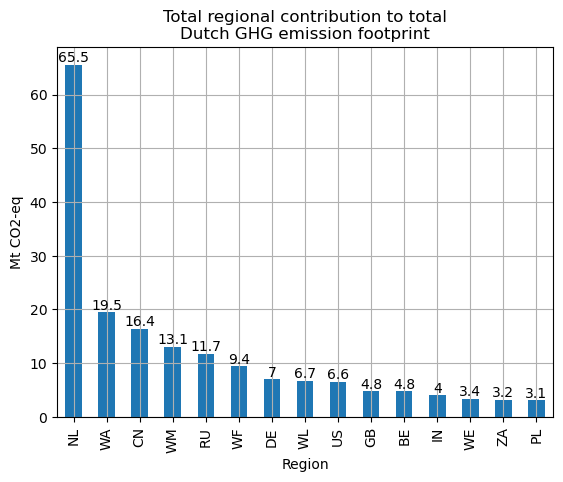

In [24]:
# plot your results with plot.bar()
top_15_results = e_rb_sorted[:15] /1e9 # dividing by 1e9 (1 billion) we convert kg to Mtonnes

top_15_plot = top_15_results.round(1).plot.bar(xlabel='Region', grid=True, ylabel="Mt CO2-eq", title="Total regional contribution to total\nDutch GHG emission footprint")

# applying bar labels
top_15_plot = top_15_plot.bar_label(top_15_plot.containers[0], label_type='edge')

#### 6.2 Let's normalize results by the total footprint of NL consumption

In [25]:
# Normalize your results
e_rb_sorted_norm = round(e_rb_sorted/e_total_reg*100, 1)

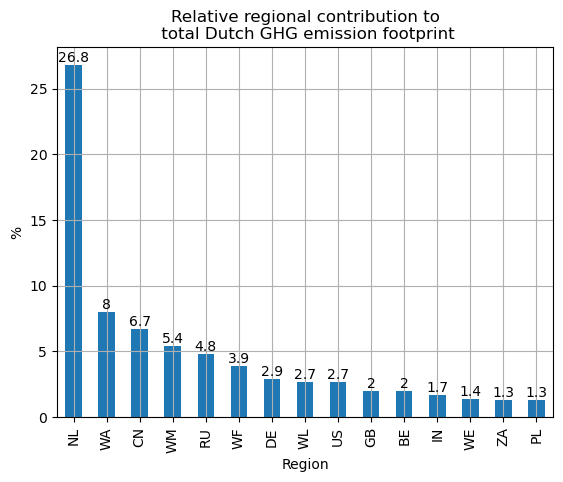

In [26]:
# Plot top 15 regions
top_15_norm_plot = e_rb_sorted_norm[:15].plot.bar(xlabel='Region', grid=True , ylabel="%", title="Relative regional contribution to\n total Dutch GHG emission footprint")

# applying bar labels
top_15_norm_plot = top_15_norm_plot.bar_label(top_15_norm_plot.containers[0], label_type='edge')